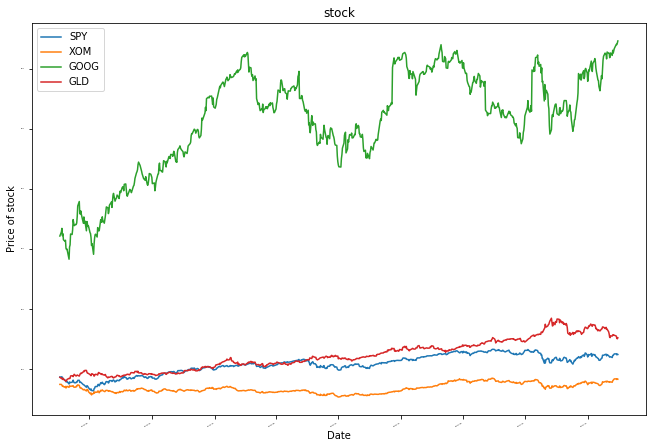

               SPY    XOM    GOOG     GLD
2009-01-02   86.80  74.48  321.32   86.23
2009-01-05   86.70  74.47  328.05   84.48
2009-01-06   87.28  73.26  334.06   85.13
2009-01-07   84.67  71.39  322.01   82.75
2009-01-08   85.01  72.15  325.19   84.46
2009-01-09   83.19  70.77  315.07   83.92
2009-01-12   81.19  69.83  312.69   80.76
2009-01-13   81.34  71.09  314.32   80.88
2009-01-14   78.78  68.51  300.97   79.79
2009-01-15   78.81  69.94  298.99   80.39
2009-01-16   79.43  71.25  299.67   82.71
2009-01-20   75.23  69.60  282.75   84.52
2009-01-21   78.48  72.31  303.08   84.15
2009-01-22   77.27  71.37  306.50   84.58
2009-01-23   77.61  71.20  324.70   88.53
2009-01-26   78.14  71.71  323.87   88.95
2009-01-27   78.93  72.00  331.48   88.38
2009-01-28   81.60  72.30  348.67   87.42
2009-01-29   78.95  70.25  343.32   89.50
2009-01-30   77.34  69.77  338.53   91.31
2009-02-02   77.11  69.96  340.57   88.84
2009-02-03   78.19  71.27  340.45   88.47
2009-02-04   77.81  70.85  343.00 

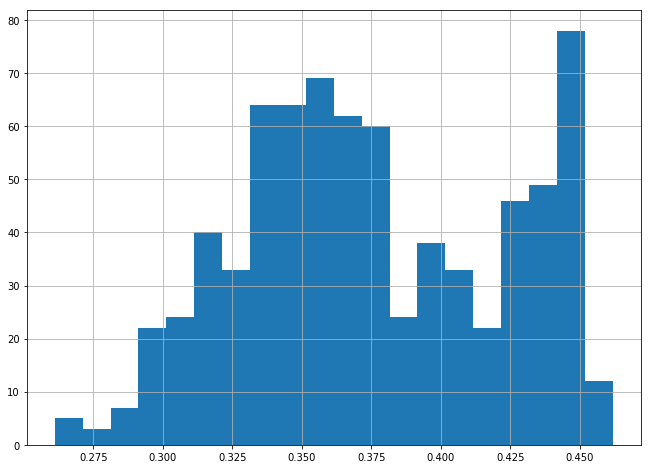

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

    
def symbol_to_path(symbol, base_dir='data'):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol),index_col="Date",parse_dates=True,usecols=['Date','Adj Close'],
                              na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close':symbol})
        df = df.join(df_temp,how="inner")
    return df

def plot_data(df,title="stock"):
    ax = df.plot(title=title,fontsize=2) #creating object of the plot
    ax.set_xlabel("Date")         #setting x label on plot object
    ax.set_ylabel("Price of stock")  #setting ylabel on plot object
    plt.show()
    
# normalizing the prices of stocks   
def normalize_dataframe(df):
    normed = df.copy()
    normed = df / df.iloc[0]   # iloc[0] - postional indexing(for selecting full 0th row)
    return normed


# Allocatinng the percentage of total funds to the stocks
# SPY - 40%
# XOM - 40%
# GOOG - 10%
# GLD - 10%
def allocate_funds(df,normed,alloc):
    alloced = df.copy
    alloced = normed * alloc
    return alloced


def compute_values(alloced):
    pos_vals = alloced.copy()
    start_vals = pos_vals.iloc[0]
    pos_vals = alloced * start_vals
    return pos_vals



def compute_post_values(pos_vals):
    post_values = pos_vals.sum(axis=1)
    return post_values


    
def cum_return(post_values):
    # For returning cumulative return of a portfolio
    cum_returns = ( post_values.iloc[-1] / post_values.iloc[0] ) -1
    return cum_returns
    
    
def average_daily_return(daily_returns):
    # for returning Average return of a portfolio
    avg_d_ret = daily_returns.mean()
    return avg_d_ret
    
    
    
def risk_factor(daily_returns):
    # for printing Risk or standard deviation over the return i.e. Risk factor
    risk_f = daily_returns.std()
    return risk_f
    
def sharp_ratio(daily_returns, risk_f):
    # for retirning Sharp ratio of a portfolio
    upper = daily_returns - risk_f
    num = upper.mean()
    sh_ratio = (num / risk_f) * np.sqrt(252)
    return sh_ratio
    
    
    
    
if __name__ == "__main__":
    start_date="2009-01-01" 
    end_date="2011-12-31"
    dates = pd.date_range(start_date,end_date)
    symbols = ['SPY','XOM','GOOG','GLD']
    
    df = get_data(symbols, dates)
    plot_data(df)
    print(df)
    
    # aalocations for stocks
    alloc = [0.4,0.4,0.1,0.1]
    
    
    #normalizing the prices of each stock
    normed = normalize_dataframe(df)
    
    # Allocating funds to availble stocks
    alloced = allocate_funds(df,normed,alloc)
    print(alloced)
    
    pos_vals = compute_values(alloced)
    
    # Computing post values
    post_values = compute_post_values(pos_vals)
    print(post_values)
    
    # Computing daily returns
    daily_returns = post_values[1:]
    print(daily_returns)
    #plotting daily returns histogram
    daily_returns.hist(bins=20)
        
    
    
    # Computing cummlative returns
    cum_returns = cum_return(post_values)
    print("Cummulative retun of portfolio : ",cum_returns)
    
    #Computing average daily returns
    avg_d_ret = average_daily_return(daily_returns)
    print("Average daily returns : ",avg_d_ret)
    
    # Computing risk factor
    risk_f = risk_factor(daily_returns)
    print("Risk factor on investment : ",risk_f)
     
    # sharp ratio computing annualy sqrt(252)
    sh_ratio = sharp_ratio(daily_returns,risk_f)
    print("Sharp ratio is : ",sh_ratio)
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=11
    fig_size[1]=8
